In [1]:
#import google cloud related python libraries
from google.datalab import Context
import google.datalab.bigquery as bq
import google.datalab.storage as storage
try:
  from StringIO import StringIO
except ImportError:
  from io import BytesIO as StringIO

In [17]:
#import data analysis related python libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#plotting
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [4]:
#list all data files
%gcs list --objects gs://buck1001012/

Name,Type,Size,Updated
instacart_data/aisles.csv,application/octet-stream,2603,2017-12-05 17:23:06.838000+00:00
instacart_data/departments.csv,application/octet-stream,270,2017-12-03 05:11:07.018000+00:00
instacart_data/order_products__prior.csv,application/octet-stream,577550706,2017-12-03 05:15:56.260000+00:00
instacart_data/order_products__train.csv,application/octet-stream,24680147,2017-12-03 05:11:20.296000+00:00
instacart_data/orders.csv,application/octet-stream,128380990,2017-12-05 19:00:53.295000+00:00
instacart_data/products.csv,application/octet-stream,2166953,2017-12-03 05:11:23.451000+00:00
instacart_data/sample_submission.csv,application/octet-stream,1475693,2017-12-03 05:11:26.512000+00:00
orders2.csv,text/plain,8026,2017-12-05 18:41:27.638000+00:00
results/,application/x-www-form-urlencoded;charset=utf-8,0,2017-12-06 11:26:17.630000+00:00
results/valu.csv,application/octet-stream,1756136,2017-12-06 11:26:38.894000+00:00


In [6]:
#we can directly create tables on bigquery using data in google cloud storage


In [7]:
#we can even load data into pandas dataframe from google cloud storage
#run the following commands



#read each file into a seperate variable from storage


# %gcs read --object gs://buck1001012/instacart_data/aisles.csv --variable aisles
# %gcs read --object gs://buck1001012/instacart_data/departments.csv --variable dept
# %gcs read --object gs://buck1001012/instacart_data/order_products__prior.csv --variable ord_prd_prior
# %gcs read --object gs://buck1001012/instacart_data/order_products__train.csv --variable ord_prd_train
# %gcs read --object gs://buck1001012/instacart_data/orders.csv --variable orders
# %gcs read --object gs://buck1001012/instacart_data/products.csv --variable products
# %gcs read --object gs://buck1001012/instacart_data/sample_submission.csv --variable samples_submission



#now load into pandas dataframe

# ord_prd_train_df = pd.read_csv(StringIO(ord_prd_train))
# ord_prd_prior_df = pd.read_csv(StringIO(ord_prd_prior))
# ord_df = pd.read_csv(StringIO(orders))
# prd_df = pd.read_csv(StringIO(products))
# aisles_df = pd.read_csv(StringIO(aisles))
# dept_df = pd.read_csv(StringIO(dept))

In [20]:
#now lets 
#   run a query
#   load the results into a pandas dataframe and 
#   plot using seaborn

#### now lets 
<p>   1. Run a query</p>
<p>   2. Load the results into a pandas dataframe and</p>
<p>   3. Plot using seaborn</p>

In [10]:
%%bq query -n query1
SELECT
  eval_set,
  COUNT(*) AS `num`
FROM
  `newproject-186115.kaggle.ord`
GROUP BY
  eval_set
ORDER BY `num` DESC

In [13]:
%%bq execute --query query1

eval_set,num
prior,3214874
train,131209
test,75000


In [14]:
#load results into a pandas dataframe
eval_df = query1.execute(output_options=bq.QueryOutput.dataframe()).result()

In [15]:
eval_df

,eval_set,num
0,prior,3214874
1,train,131209
2,test,75000


There are a total of > 3.2 million orders

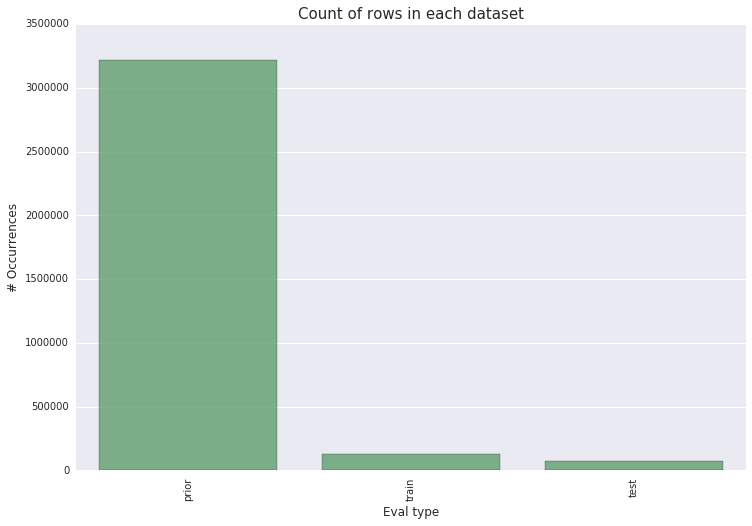

In [19]:
#plot the occurance
plt.figure(figsize=(12,8))
sns.barplot(eval_df.eval_set, eval_df.num, alpha=0.8, color=color[1])
plt.ylabel('# Occurrences', fontsize=12)
plt.xlabel('Eval type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [21]:
%%bq query -n query2
SELECT
  eval_set, user_id, COUNT(*)
FROM
  `newproject-186115.kaggle.ord`
GROUP BY
  eval_set, user_id

In [22]:
%%bq execute --query query2

eval_set,user_id,f0_
test,107549,1
test,25145,1
test,90339,1
test,153025,1
test,143206,1
test,149893,1
test,49289,1
test,148654,1
test,93064,1
test,188,1


In [23]:
#load results into a pandas dataframe
eval_df2 = query2.execute(output_options=bq.QueryOutput.dataframe()).result()

In [24]:
eval_df2.eval_set.value_counts()

prior    206209
train    131209
test      75000
Name: eval_set, dtype: int64

In the dataset, there are around 206k unique orders, which are split into around 131k unique orders for training and 75k for testing

In [ ]:
#We merge Products, Departments, Orders, Aisles, Order_Propd_Prior into a single table using letf outer join
#eg. 
# SELECT order_id, add_to_cart_order, reordered, product_name, aisle_id, department_id
# FROM `newproject-xxxxx.kaggle.prior`
# LEFT OUTER JOIN `newproject-xxxxx.kaggle.prod`
#   ON `newproject-xxxxx.kaggle.prior`.product_id = `newproject-xxxxx.kaggle.prod`.product_id;


#The next notebook 2_eda will access this new table to perform analysis